# Pandas data analysis - case air quality data

Some imports:

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

pd.options.display.max_rows = 8

## Some 'theory': the groupby operation (split-apply-combine)

By "group by" we are referring to a process involving one or more of the following steps

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

<img src="img/splitApplyCombine.png">

Similar to SQL `GROUP BY`

The example of the image in pandas syntax:

In [33]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,data,key
0,0,A
1,5,B
2,10,C
3,5,A
...,...,...
5,15,C
6,10,A
7,15,B
8,20,C


In [34]:
df.groupby('key').aggregate('sum')  # np.sum

,data
key,
A,15
B,30
C,45


In [35]:
df.groupby('key').sum()

,data
key,
A,15
B,30
C,45


## Back to the air quality data

<div class="alert alert-success">
    <b>QUESTION</b>: how does the *typical monthly profile* look like for the different stations?
</div>

1\. add a column to the dataframe that indicates the month (integer value of 1 to 12):

In [36]:
data['month'] = data.index.month

2\. Now, we can calculate the mean of each month over the different years:

In [37]:
data.groupby('month').mean()

,BETR801,BETN029,FR04037,FR04012
month,,,,
1,51.955189,19.832429,47.634409,82.472813
2,53.721187,20.238004,50.564499,83.973207
3,53.737157,19.741470,47.862715,96.272138
4,49.445248,17.865095,40.943117,95.962862
...,...,...,...,...
9,47.193898,14.292315,39.706019,93.000316
10,48.649218,17.007418,44.010934,86.297836
11,50.186465,17.900151,45.564683,87.173878
12,50.194588,20.200031,45.262243,81.817977


3\. plot the typical monthly profile of the different stations:

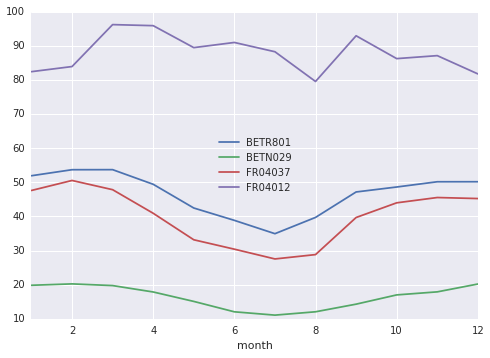

In [38]:
data.groupby('month').mean().plot()

<div class="alert alert-success">
    <b>QUESTION</b>: plot the weekly 95% percentiles of the concentration in 'BETR801' and 'BETN029' for 2011
</div>


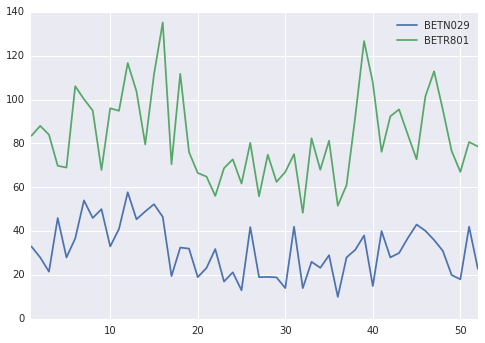

In [39]:
df2011 = data['2011']
df2011.groupby(df2011.index.week)[['BETN029', 'BETR801']].quantile(0.95).plot()

In [40]:
data = data.drop('month', axis=1)

<div class="alert alert-success">
    <b>QUESTION</b>: The typical diurnal profile for the different stations?
</div>

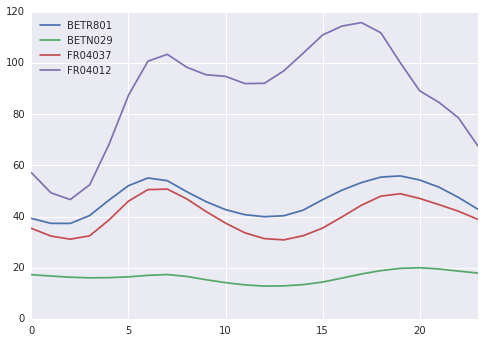

In [41]:
data.groupby(data.index.hour).mean().plot()

<div class="alert alert-success">
    <b>QUESTION</b>: What is the difference in the typical diurnal profile between week and weekend days?
</div>

In [42]:
data.index.weekday?

In [43]:
data['weekday'] = data.index.weekday

Add a column indicating week/weekend

In [44]:
data['weekend'] = data['weekday'].isin([5, 6])

In [45]:
data_weekend = data.groupby(['weekend', data.index.hour]).mean()
data_weekend.head()

BETR801    BETN029    FR04037    FR04012  weekday
weekend                                                       
False   0  38.693423  17.415094  34.439398  52.094663        2
        1  37.128589  16.985991  31.585121  44.721629        2
        2  37.837973  16.530217  30.865143  43.518539        2
        3  42.446300  16.362120  32.963500  51.942135        2
        4  50.478893  16.696870  40.780162  72.547472        2

In [46]:
data_weekend_FR04012 = data_weekend['FR04012'].unstack(level=0)
data_weekend_FR04012.head()

weekend,False,True
0,52.094663,69.817219
1,44.721629,60.697248
2,43.518539,54.407904
3,51.942135,53.534933
4,72.547472,57.472830


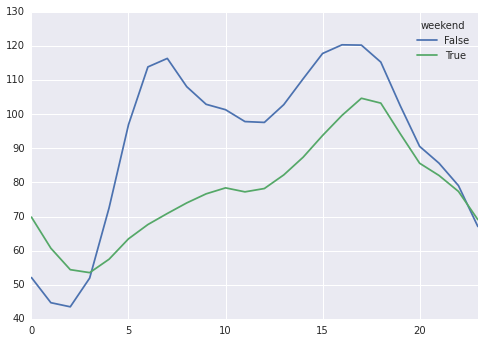

In [47]:
data_weekend_FR04012.plot()

In [48]:
data = data.drop(['weekday', 'weekend'], axis=1)

<div class="alert alert-success">
    <b>QUESTION</b>: What are the number of exceedances of hourly values above the European limit 200 µg/m3 ?
</div>

In [49]:
exceedances = data > 200

In [50]:
# group by year and count exceedances (sum of boolean)
exceedances = exceedances.groupby(exceedances.index.year).sum()

In [51]:
exceedances

,BETR801,BETN029,FR04037,FR04012
1999,0,0,3,39
2000,0,0,0,17
2001,0,0,0,88
2002,0,0,0,12
...,...,...,...,...
2009,0,0,0,58
2010,0,0,0,104
2011,1,0,0,62
2012,6,0,0,13


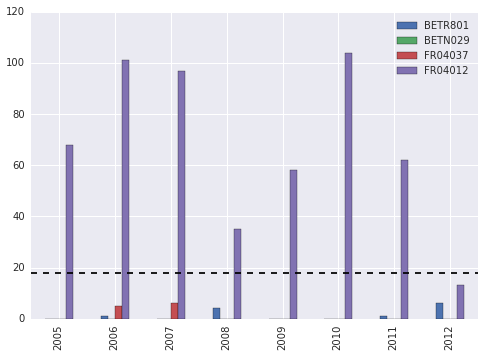

In [52]:
ax = exceedances.loc[2005:].plot(kind='bar')
ax.axhline(18, color='k', linestyle='--')

<div class="alert alert-success">
    <b>QUESTION</b>: And are there exceedances of the yearly limit value of 40 µg/m3 since 200 ?
</div>

In [53]:
yearly = data['2000':].resample('A')

In [54]:
(yearly > 40).sum()

BETR801    13
BETN029     0
FR04037     5
FR04012    13
dtype: int64

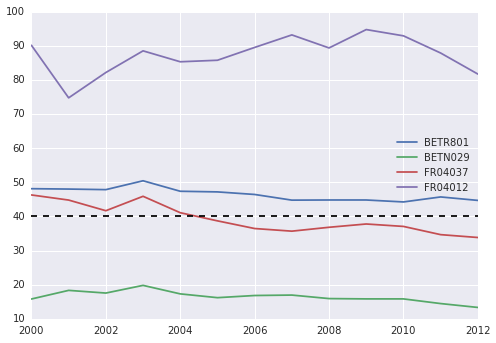

In [55]:
yearly.plot()
plt.axhline(40, linestyle='--', color='k')

<div class="alert alert-success">
    <b>QUESTION</b>: Visualize the typical week profile for the different stations as boxplots.
</div>

Tip: the boxplot method of a DataFrame expects the data for the different boxes in different columns)

In [56]:
# add a weekday and week column
data['weekday'] = data.index.weekday
data['week'] = data.index.week
data.head()

,BETR801,BETN029,FR04037,FR04012,weekday,week
1999-01-01 00:00:00,27,13,68,105,4,53
1999-01-01 01:00:00,33,15,70,116,4,53
1999-01-01 02:00:00,24,16,72,114,4,53
1999-01-01 03:00:00,26,18,72,91,4,53
1999-01-01 04:00:00,NaN,19,74,81,4,53


In [57]:
# pivot table so that the weekdays are the different columns
data_pivoted = data['2012'].pivot_table(columns='weekday', index='week', values='FR04037')
data_pivoted.head()

weekday,0,1,2,3,4,5,6
week,,,,,,,
1,24.625000,23.875000,26.208333,17.500000,40.208333,24.625000,22.375000
2,39.125000,44.125000,57.583333,50.750000,40.791667,34.750000,32.250000
3,45.208333,66.333333,51.958333,28.250000,28.291667,18.416667,18.333333
4,35.333333,49.500000,49.375000,48.916667,63.458333,34.250000,25.250000
5,47.791667,38.791667,54.333333,50.041667,51.458333,46.541667,35.458333


/usr/lib/miniconda3/envs/anaconda3/lib/python3.4/site-packages/pandas/tools/plotting.py:2633: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  warnings.warn(msg, FutureWarning)


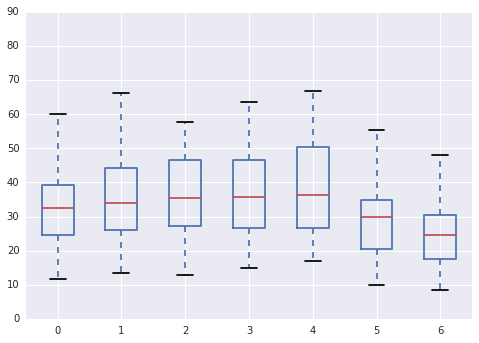

In [58]:
box = data_pivoted.boxplot()

<div class="alert alert-success">
    <b>QUESTION</b>: Calculate the correlation between the different stations
</div>


In [59]:
data[['BETR801', 'BETN029', 'FR04037', 'FR04012']].corr()

,BETR801,BETN029,FR04037,FR04012
BETR801,1.000000,0.472954,0.561676,0.394446
BETN029,0.472954,1.000000,0.401864,0.186997
FR04037,0.561676,0.401864,1.000000,0.433466
FR04012,0.394446,0.186997,0.433466,1.000000


In [60]:
data[['BETR801', 'BETN029', 'FR04037', 'FR04012']].resample('D').corr()

,BETR801,BETN029,FR04037,FR04012
BETR801,1.000000,0.604825,0.663855,0.459885
BETN029,0.604825,1.000000,0.527390,0.312484
FR04037,0.663855,0.527390,1.000000,0.453584
FR04012,0.459885,0.312484,0.453584,1.000000


# Further reading

- the documentation: http://pandas.pydata.org/pandas-docs/stable/
- Wes McKinney's book "Python for Data Analysis"
- lots of tutorials on the internet, eg http://github.com/jvns/pandas-cookbook


## Acknowledgement

> *© 2015, Stijn Van Hoey and Joris Van den Bossche  (<mailto:stijnvanhoey@gmail.com>, <mailto:jorisvandenbossche@gmail.com>). Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*